In [1]:
import torch
import pandas as pd
import numpy as np
import pickle as pk

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, IncrementalPCA

from check_lang import lang_checker_langdetect, id_to_en
from functions import *
from Preprocessing import *

# pd.options.mode.chained_assignment = None  # default='warn'

d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data/data_sinta_cleaned_s2.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.title = df.title.apply(lambda x : x.lower())

df

,journal,title,abstract,data_cleaned,lang,label
0,23380403,purwarupa sistem pemantau dan peringatan kadar...,"<jats:p>High growth in vehicle, contribute air...",purwarupa sistem pemantau dan peringatan kadar...,en,0
1,23380403,implementasi jaringan syaraf tiruan perambatan...,<jats:p>Gold is one of commodities investment ...,implementasi jaringan syaraf tiruan perambatan...,en,0
2,23380403,perancangan jaringan sensor terdistribusi untu...,<jats:p>This paper contains distributed sensor...,perancangan jaringan sensor terdistribusi untu...,en,0
3,23380403,analisis perbandingan unjuk kerja sistem penye...,<jats:p>The development of internet technology...,analisis perbandingan unjuk kerja sistem penye...,en,0
4,23380403,pembuatan aplikasi mobile learning sebagai sar...,<jats:p>Mobile learning is the intersection of...,pembuatan aplikasi mobile learning sebagai sar...,en,0
...,...,...,...,...,...,...
178750,28093216,analysis of literacy-based learning media prod...,<jats:p>Literacy is an important skill that ev...,analysis of literacy-based learning media prod...,en,0
178751,28093216,implementation of steam-based digital learning...,<jats:p>The lack of optimal empowerment of eff...,implementation of steam-based digital learning...,en,0
178752,28093216,web-cms based as teaching materials to improve...,<jats:p>Technology advances and the profusion ...,web-cms based as teaching materials to improve...,en,0
178753,28093216,sw-blend: student worksheets for blended learn...,<jats:p>Blended learning is learning that is a...,sw-blend: student worksheets for blended learn...,en,0


In [5]:
df.data_cleaned.sample().values[0]

'ambang waktu pendedahan telur lymnaea sp untuk mengamati abnormalitas embrio sebagai parameter dalam uji hayati terhadap karbamat the aim of this study was to know the specific expose period of the lymnaea sp embyos and their age in order to utilization eggs of lymnaea sp in bioassay fifty individuals of lymnaea sp collected from gonggan river magetan were captured in laboratory egg cluster of each individual then was placed in petry dish which was filled by baycarb  ec of     and   ppm the result showed that  hours exposure in baycarb  ec was the effective time since within  hours all of embryos were death and abnormalities of the survivals was detected in the embryos of  and  hours'

In [4]:
n = len(df) # how many rows we have in the X_set
chunk_size = 1000 # how many rows we feed to IPCA at a time, the divisor of n

# df['data_cleaned'] = df.abstract.apply(preprocess_text)
# df['data_cleaned'] = df.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)  

# df['data_cleaned'] = df.desc.apply(preprocess_text)
# df['data_cleaned'] = df.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)  

# df['lang'] = df.data_cleaned.apply(lang_checker_langdetect)
df = df[df.lang.isin(['en', 'id'])]

for i in range(0, n//chunk_size):
    if i != (n//chunk_size) - 1:
        df[df.lang == 'id']['data_cleaned'].iloc[i*chunk_size : (i+1)*chunk_size] = df[df.lang == 'id']['data_cleaned'].iloc[i*chunk_size : (i+1)*chunk_size].apply(lambda x : id_to_en(x))
        df[df.lang == 'id']['lang'].iloc[i*chunk_size : (i+1)*chunk_size] = 'en'
    else:
        df[df.lang == 'id']['data_cleaned'].iloc[(i+1)*chunk_size:] = df[df.lang == 'id']['data_cleaned'].iloc[(i+1)*chunk_size:].apply(lambda x : id_to_en(x))
        df[df.lang == 'id']['lang'].iloc[(i+1)*chunk_size:] = 'en'

    print(f'batch {i+1} clear')

    
df = df[df.lang.isin(['en'])]
# df['label'] = df.eissn
df.loc[:, 'label'] = 0

df

An error occurred: potensi salep epigallocatechin gallate terhadap proses kesembuhan luka bakar derajat ii pada kulit tikus putih (the potential of epigallocatechin gallate  ointment to the wound healing process of second degree skin burns on the albino rats) burns are one of the health problems in modern society that are associated with tissue damage that is difficult to repair and affect patients both physically and psychologically this study was conducted to evaluate the potential of epigallocatechin gallate egcg  ointment to the healing process of second degree skin burn induced by attaching ºc plate with  cm of diameter for  second on the skin of albino rat rattus norvegicus twentyfive rats were divided into  treatment groups the p group was a group of rat that suffered burns and were treated with ointment base peg the p group was a group of rat that suffered burns and were given standard therapy with silver sulfadiazine p p and p groups are groups of rat that have burns and are t

C:\Users\rarmn\AppData\Local\Temp\ipykernel_9396\923768528.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[df.lang == 'id']['data_cleaned'].iloc[i*chunk_size : (i+1)*chunk_size] = df[df.lang == 'id']['data_cleaned'].iloc[i*chunk_size

batch 1 clear


KeyboardInterrupt: 

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_checkpoint = 'bert-base-cased'

bert_path = 'model/bert_pipeline3_3_123.pt'
model_bert = BertClassifierEmbed(123, model_checkpoint)
checkpoint_bert = torch.load(bert_path)
model_bert.load_state_dict(checkpoint_bert)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

<All keys matched successfully>

In [8]:
journal_type = 'pipeline_3_2'
journal_id = 'sinta_2'

file_path = os.path.join('src', journal_type)

if not os.path.exists(file_path):
    os.mkdir(file_path)

In [9]:
ipca = IncrementalPCA(n_components=2, batch_size=16)

ipca = pk.load(open(f"{file_path}/{'baseline'}/pca.pkl",'rb'))

In [14]:
df.iloc[0].data_cleaned

'purwarupa sistem pemantau dan peringatan kadar gas karbon monoksida (co) pada kabin mobil berbasis mikrokontroler atmega8 high growth in vehicle contribute air pollution and reduce human health quality one of pollutants that generated by motor vehicle emissions is carbon monoxide co co gas can cause health problems for humans even if exposed to long periods time will cause death emission test devices have been widely available in many auto repair shops but at the moment emission testing only read gas source or emissions sources from the muffler hole cabin space usually escaped from checking whether there is pollution that enters the cabin or not this final project has a purpose to design a carbon monoxide detector devices which will show the levels of carbon monoxide co into  categories of air qualitythat are safe wary watch out and danger system will automatically warning the driver if the gas exceeds the threshold microcontroller that used as the central data processing data is micr

In [10]:
X = None

index = []

for i in range(0, n//chunk_size):
    data = df.iloc[i*chunk_size : (i+1)*chunk_size]

    selected_journal_en = data[data.lang == 'en']

    index = index + list(selected_journal_en.index)

    embeddings = embed(selected_journal_en, model_checkpoint, model_bert, device = device)

    X_ = embeddings.reshape(embeddings.shape[0], -1)

    pca_transform = ipca.transform(X_)

    if X is None:
        X = pca_transform
    else:
        X = np.append(X, pca_transform, axis = 0)

    print(f'embedding ke {(i+1)*1000} berhasil')


d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


embedding ke 1000 berhasil
embedding ke 2000 berhasil
embedding ke 3000 berhasil
embedding ke 4000 berhasil
embedding ke 5000 berhasil
embedding ke 6000 berhasil
embedding ke 7000 berhasil
embedding ke 8000 berhasil
embedding ke 9000 berhasil
embedding ke 10000 berhasil
embedding ke 11000 berhasil
embedding ke 12000 berhasil
embedding ke 13000 berhasil
embedding ke 14000 berhasil
embedding ke 15000 berhasil
embedding ke 16000 berhasil
embedding ke 17000 berhasil
embedding ke 18000 berhasil
embedding ke 19000 berhasil
embedding ke 20000 berhasil
embedding ke 21000 berhasil
embedding ke 22000 berhasil
embedding ke 23000 berhasil
embedding ke 24000 berhasil
embedding ke 25000 berhasil
embedding ke 26000 berhasil
embedding ke 27000 berhasil
embedding ke 28000 berhasil
embedding ke 29000 berhasil
embedding ke 30000 berhasil
embedding ke 31000 berhasil
embedding ke 32000 berhasil
embedding ke 33000 berhasil
embedding ke 34000 berhasil
embedding ke 35000 berhasil
embedding ke 36000 berhasil
e

KeyboardInterrupt: 

In [ ]:
data = df.iloc[(i+1)*chunk_size:]

selected_journal_en = data[data.lang == 'en']
selected_journal_id = data[data.lang == 'id']

index = index + list(selected_journal_en.index)

embeddings = embed(selected_journal_en, model_checkpoint, model_bert, device = device)

X_ = embeddings.reshape(embeddings.shape[0], -1)

pca_transform = ipca.transform(X_)

X = np.append(X, pca_transform, axis = 0)

In [ ]:
len(X), len(index), len(df)

(126393, 126393, 178702)

In [ ]:
with open(f"{file_path}/{'baseline'}/kmeans.pkl", "rb") as f:
    kmeans = joblib.load(f)

kmeans_labels = kmeans.predict(X)
kmeans_labels

array([14,  6, 36, ...,  0, 37, 16])

In [ ]:
df_res = df.loc[index]

df_res['kmeans_labels'] = kmeans_labels

cluster_labels = kmeans.labels_

# Mendapatkan koordinat pusat cluster
centroids = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = centroid_dist(kmeans, X, label=kmeans_labels)

# Menentukan batas jarak yang dianggap sebagai "outscoop"
threshold = outscoop_threshold(jarak_ke_centroid)

scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > threshold] = -1

save_data(journal_id, journal_type, kmeans, threshold, X, df_res[['data_cleaned', 'journal', 'lang', 'kmeans_labels']], scoop_labels)

print("Data sebaran PCA telah disimpan.")

d:\GitHub\Jurnal-Clustering\functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = scoop_labels


Data sebaran PCA telah disimpan.


d:\GitHub\Jurnal-Clustering\functions.py:59: UserWarning: The palette list has more values (41) than needed (40), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


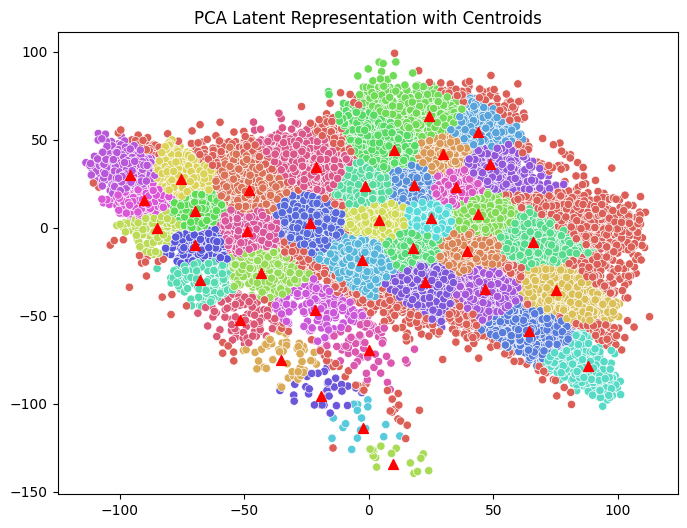

In [12]:
kmeans, threshold, X, df_res = load_data(journal_id, journal_type)
# journal = list(df_res.journal.apply(lambda x : 1 if x == '25277456' else 0))
scoop_labels = list(df_res.Label)
lang = list(df_res.lang)
# journal = list(df_res.journal)

plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop=True, label = df_res.kmeans_labels, lang = lang)

In [17]:
df_res.journal.unique()

array(['23380403', '25023993', '24775665', '25802364', '25496409',
       '27229696', '2407263X', '26148935', '24778524', '25414054',
       '26144735', '25498290', '25278827', '26562804', '25795562',
       '26158558', '24430390', '25023489', '25497669', '25031481',
       '24609927', '26563193', '24424730', '24076015', '25286579',
       '25286811', '26211378', '27234975', '24424226', '25498959',
       '26568810', '25491040', '26158582', '23021098', '24425249',
       '26569779', '24069280', '25026216', '25021907', '25287001',
       '25033360', '2581-2912', '25812912', '26543877', '2615840X',
       '25284339', '25279165', '26145863', '25492608', '26224372',
       '26232308', '2528584X', '25412590', '25490079', '26205092',
       '25026267', '2527628X', '23026332', '25798553', '26204053',
       '25487892', '25489364', '24771503', '26146908', '24769053',
       '26227371', '25485024', '25802070', '25495720', '24611433',
       '24430994', '2581236X', '25987771', '24607258', '25796

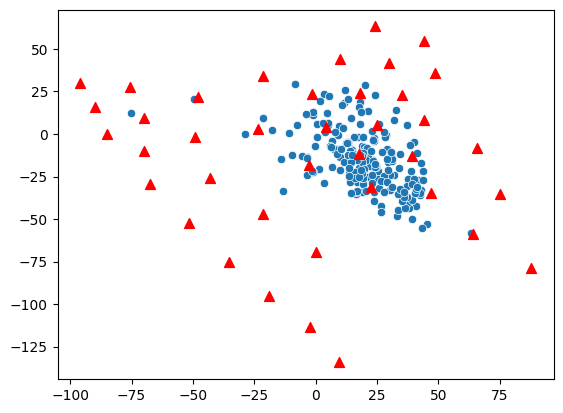

In [13]:
index = df_res[df_res.journal == '26218372'].index

df_pca = pd.DataFrame(X[index], columns=['Dimension 1', 'Dimension 2'])
plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', data=df_pca)
plot.set(xlabel = None)
plot.set(ylabel = None)
plot.legend([],[], frameon=False)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')

In [21]:
df_res

,Unnamed: 0,data_cleaned,journal,lang,kmeans_labels,Label
0,0,purwarupa sistem pemantau dan peringatan kadar...,23380403,en,24,1.0
1,1,implementasi jaringan syaraf tiruan perambatan...,23380403,en,6,1.0
2,2,perancangan jaringan sensor terdistribusi untu...,23380403,en,15,1.0
3,3,analisis perbandingan unjuk kerja sistem penye...,23380403,en,36,1.0
4,4,pembuatan aplikasi mobile learning sebagai sar...,23380403,en,9,1.0
...,...,...,...,...,...,...
178697,178452,meningkatkan daya saing daerah melalui peningk...,23558520,id,32,1.0
178698,178453,analisis flypaper effect pada belanja daerah (...,23558520,id,11,1.0
178699,178454,pemanfaatan dana corporate social responsibili...,23558520,id,11,1.0
178700,178455,socio-economic determinants of tourism trips b...,23558520,id,32,1.0


In [ ]:
outscope = df_res[scoop_labels == -1]
outscope.to_csv(f'outscope_{journal_id}_pipeline3_1.csv')